In [16]:
import sys
sys.path.append("..")
from EnsemblePursuitModule.EnsemblePursuitPyTorch import EnsemblePursuitPyTorch
import numpy as np
import time
from utils import PCA, subtract_spont
from scipy import io
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore

In [22]:
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)
X=PCA(X,k=1000)

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


(10103, 5880)
torch.Size([10103, 5880])
torch.Size([10103, 5880])


In [23]:
options_dict={'seed_neuron_av_nr':100,'min_assembly_size':8}
#ep_pt=EnsemblePursuitNumpy(n_ensembles=300,lambd=0.005,options_dict=options_dict)
ep_pt=EnsemblePursuitPyTorch(n_ensembles=150,lambd=0.05,options_dict=options_dict)
start=time.time()
U,V=ep_pt.fit_transform(X)
end=time.time()
#np.save('U_spks_strict.npy',U)
#np.save('V_spks_strict.npy',V)

ensemble nr 0
cost tensor(0.9695, device='cuda:0')
ensemble nr 1
cost tensor(0.9670, device='cuda:0')
ensemble nr 2
cost tensor(0.9641, device='cuda:0')
ensemble nr 3
cost tensor(0.9613, device='cuda:0')
ensemble nr 4
cost tensor(0.9590, device='cuda:0')
ensemble nr 5
cost tensor(0.9564, device='cuda:0')
ensemble nr 6
cost tensor(0.9546, device='cuda:0')
ensemble nr 7
cost tensor(0.9529, device='cuda:0')
ensemble nr 8
cost tensor(0.9511, device='cuda:0')
ensemble nr 9
cost tensor(0.9496, device='cuda:0')
ensemble nr 10
cost tensor(0.9483, device='cuda:0')
ensemble nr 11
cost tensor(0.9469, device='cuda:0')
ensemble nr 12
cost tensor(0.9454, device='cuda:0')
ensemble nr 13
cost tensor(0.9441, device='cuda:0')
ensemble nr 14
cost tensor(0.9430, device='cuda:0')
ensemble nr 15
cost tensor(0.9419, device='cuda:0')
ensemble nr 16
cost tensor(0.9408, device='cuda:0')
ensemble nr 17
cost tensor(0.9399, device='cuda:0')
ensemble nr 18
cost tensor(0.9389, device='cuda:0')
ensemble nr 19
cost te

In [24]:
istim_path='/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat'
istim=io.loadmat(istim_path)['stim']['istim'][0][0].astype(np.int32)
            
istim -= 1 # get out of MATLAB convention
istim = istim[:,0]
nimg = istim.max() # these are blank stims (exclude them)
#V=np.load('V_spks_strict.npy')
#V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy')
V=np.array(V)
V = V[istim<nimg, :]
istim = istim[istim<nimg]
x_train,x_test,y_train,y_test=test_train_split(V,istim)
acc=evaluate_model_torch(x_train,x_test)

(2800, 2800)


In [25]:
print(V.shape)
print(acc)

(5600, 150)
0.4514285714285714


nmin 150
0.0028791427612304688
0.034832000732421875
0.03788876533508301
0.054868221282958984
(38, 40)
(70,)
1.0
time; iteration;  explained PC variance
0.14s     0        0.0291      2
0.29s    10        0.1381      4
0.44s    20        0.1959      8
0.60s    30        0.2572      18
0.75s    40        0.2925      28
0.91s    50        0.3104      38
1.07s    60        0.3118      38
1.23s   final      0.3119
1.23s upsampled    0.3119
[5035 6277 6217 ... 1437 5075 1870]
[[0.08852482 0.03675489 0.         ... 0.         0.         0.        ]
 [0.0853672  0.04555966 0.         ... 0.         0.         0.        ]
 [0.07859106 0.06068014 0.         ... 0.         0.         0.        ]
 ...
 [0.11497891 0.12586607 0.         ... 0.         0.         0.        ]
 [0.1361145  0.14887635 0.         ... 0.         0.         0.        ]
 [0.14799018 0.16182312 0.         ... 0.         0.         0.        ]]


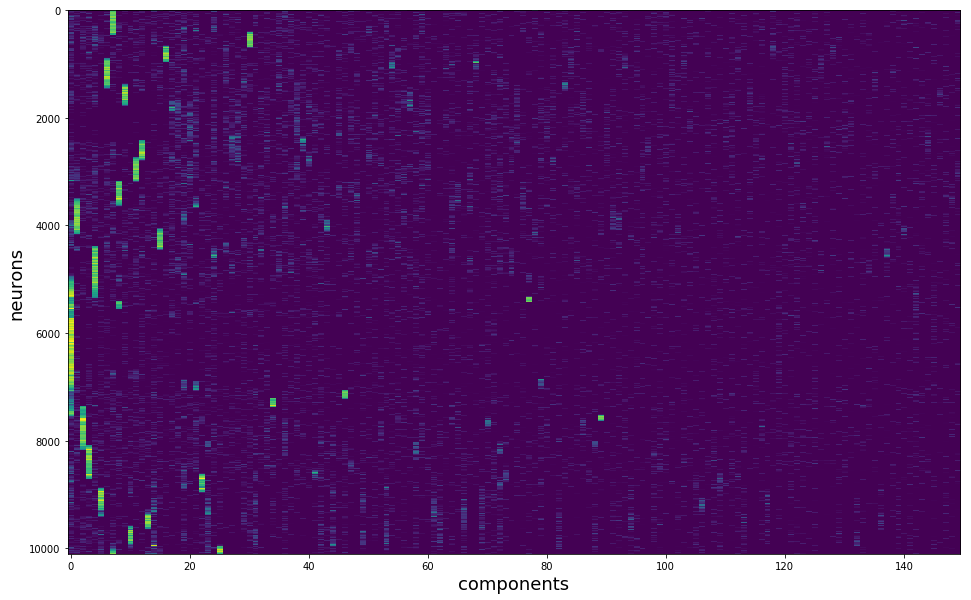

In [30]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np

U=np.load('U_spks_strict.npy')
U=np.array(U)
model = mapping.Rastermap(n_components=1).fit(np.array(U))
isort = np.argsort(model.embedding[:,0])
print(isort)
Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()


In [36]:
from sklearn.decomposition import PCA

pca=PCA(1000)
pca.fit_transform(X)
V=pca.components_.T

istim_path='/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat'
istim=io.loadmat(istim_path)['stim']['istim'][0][0].astype(np.int32)
            
istim -= 1 # get out of MATLAB convention
istim = istim[:,0]
nimg = istim.max() # these are blank stims (exclude them)
#V=np.load('V_spks_strict.npy')
#V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy')
V=np.array(V)
V = V[istim<nimg, :]
istim = istim[istim<nimg]
x_train,x_test,y_train,y_test=test_train_split(V,istim)
acc=evaluate_model_torch(x_train,x_test)


(2800, 2800)


In [37]:
print(acc)

0.6010714285714286
